### Perkenalan

Nama: Sivi Almanaf Ali Shahab

Batch: 006

**Problem Statements**

Sebuah perusahaan perbankan ingin membuat strategy marketing yang efektif penjualan kartu kredit dengan melakukan pengelompokan customer berdasarkan kriteria tertentu. Output yang dihasilkan berupa customer segmentation beberapa cluster yang meudahkan tim marketing melakukan promosi ke nasabah.


**Data Information**

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES : Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE : Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX : Numbe of purchase transactions made

CREDITLIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

### Import pustaka yang dibutuhkan

In [425]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
import seaborn as sns
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

### Data Loading

Download data di https://www.kaggle.com/arjunbhasin2013/ccdata

In [426]:
dataset = pd.read_csv('./dataset/CC GENERAL.csv')
dataset.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [427]:
dataset.shape

(8950, 18)

In [428]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [429]:
dataset.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### Data Cleaning

##### Handling Missing Values

In [430]:
dataset.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS    313
CREDIT_LIMIT          1
CUST_ID               0
BALANCE               0
PRC_FULL_PAYMENT      0
dtype: int64

<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

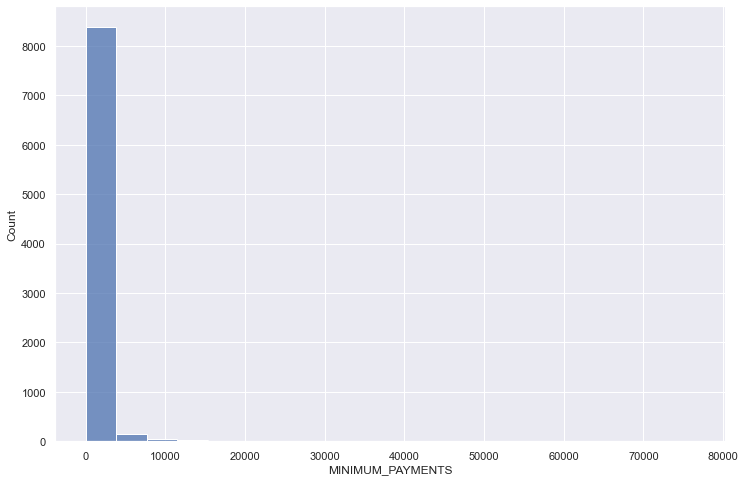

In [431]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=dataset, x="MINIMUM_PAYMENTS", bins=20)

In [432]:
dataset.loc[(dataset['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=dataset['MINIMUM_PAYMENTS'].median()
dataset.loc[(dataset['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=dataset['CREDIT_LIMIT'].mean()

In [433]:
dataset.isnull().sum().sort_values(ascending=False).head()

CUST_ID             0
BALANCE             0
PRC_FULL_PAYMENT    0
MINIMUM_PAYMENTS    0
PAYMENTS            0
dtype: int64

##### Identify Outlier

In [353]:
dataset.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8950.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.612411   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8950.000000       8950.000000  8950.000000  
mean    1733.143852        844.906767          0.153715    11.517318  
std     2895.063757       2332.792322          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        170.857654          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        788.713501          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterp

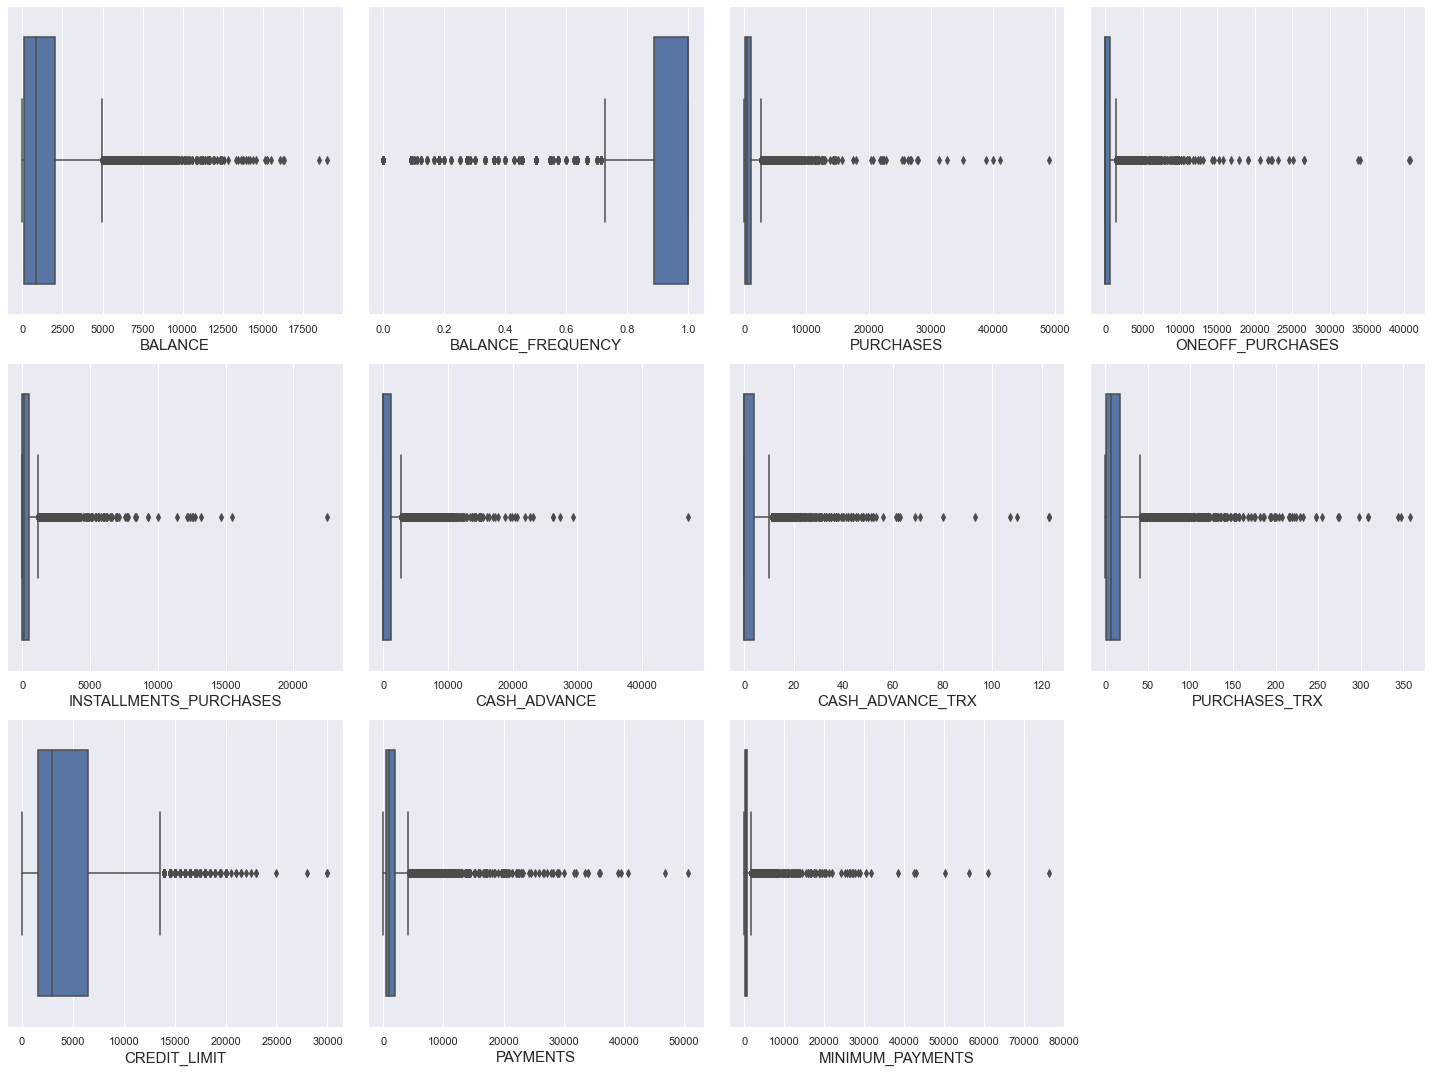

In [434]:
names = dataset[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']]
# Boxplot untuk mengetahui outlier dan distribusi data
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in names:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.boxplot(names[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [435]:
def outliers(data):
    cols = data.columns
    for i in cols:
        #print(i)
        # calculate interquartile range
        q25, q75 = percentile(data[i], 25), percentile(data[i], 75)
        iqr = q75 - q25
        print('Percentiles:',i, '25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        # identify outliers
        outliers = [x for x in data[i] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))

In [436]:
outliers(names)

Percentiles: BALANCE 25th=128.282, 75th=2054.140, IQR=1925.858
Identified outliers: 695
Percentiles: BALANCE_FREQUENCY 25th=0.889, 75th=1.000, IQR=0.111
Identified outliers: 1493
Percentiles: PURCHASES 25th=39.635, 75th=1110.130, IQR=1070.495
Identified outliers: 808
Percentiles: ONEOFF_PURCHASES 25th=0.000, 75th=577.405, IQR=577.405
Identified outliers: 1013
Percentiles: INSTALLMENTS_PURCHASES 25th=0.000, 75th=468.637, IQR=468.637
Identified outliers: 867
Percentiles: CASH_ADVANCE 25th=0.000, 75th=1113.821, IQR=1113.821
Identified outliers: 1030
Percentiles: CASH_ADVANCE_TRX 25th=0.000, 75th=4.000, IQR=4.000
Identified outliers: 804
Percentiles: PURCHASES_TRX 25th=1.000, 75th=17.000, IQR=16.000
Identified outliers: 766
Percentiles: CREDIT_LIMIT 25th=1600.000, 75th=6500.000, IQR=4900.000
Identified outliers: 248
Percentiles: PAYMENTS 25th=383.276, 75th=1901.134, IQR=1517.858
Identified outliers: 808
Percentiles: MINIMUM_PAYMENTS 25th=170.858, 75th=788.714, IQR=617.856
Identified outlie

Dari Boxplot maupun dari fungsi outlier terdapat banyak oulier yang ditemukan namun kita tidak akan menghapus semua outlier, hanya outlier yang ekstrim yang selanjutnya akan kita hapus. Berikut dibawah ini beberapa outlier dari data yang akan kita hapus berdasarkan boxplot yang telah kita lihat. Aturan penghapusan outlier ini kita bisa jadikan sebagai batasan masalah.

In [437]:
df = dataset.copy()
df.shape

(8950, 18)

Batasan masalah: Minimum Payments tidak lebih dari 30000

In [441]:
df.drop(df[df['MINIMUM_PAYMENTS'] > 30000].index, inplace=True)

Batasan masalah: Payments tidak lebih dari 30000

In [440]:
df.drop(df[df['PAYMENTS'] > 30000].index, inplace=True)

Batasan masalah: Credit Limit tidak lebih dari 20000

In [442]:
df.drop(df[df['CREDIT_LIMIT'] > 20000].index, inplace=True)

Batasan masalah: Purchases tidak lebih dari 20000

In [443]:
df.drop(df[df['PURCHASES'] > 20000].index, inplace=True)

Batasan masalah: Oneoff Purchases tidak lebih dari 20000

In [444]:
df.drop(df[df['ONEOFF_PURCHASES'] > 20000].index, inplace=True)

Batasan masalah: Cash Advanced tidak lebih dari 20000

In [445]:
df.drop(df[df['CASH_ADVANCE'] > 20000].index, inplace=True)

Batasan masalah: Installments Purchase tidak lebih dari 10000

In [446]:
df.drop(df[df['INSTALLMENTS_PURCHASES']>10000].index, inplace=True)

##### Drop Columns

In [447]:
df.drop(['CUST_ID'], axis=1, inplace=True)

In [448]:
df.shape

(8889, 17)

### Eksplorasi Data

In [449]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.343947          0.000000      12  
4   678.334763        244.791237          0.000000      12

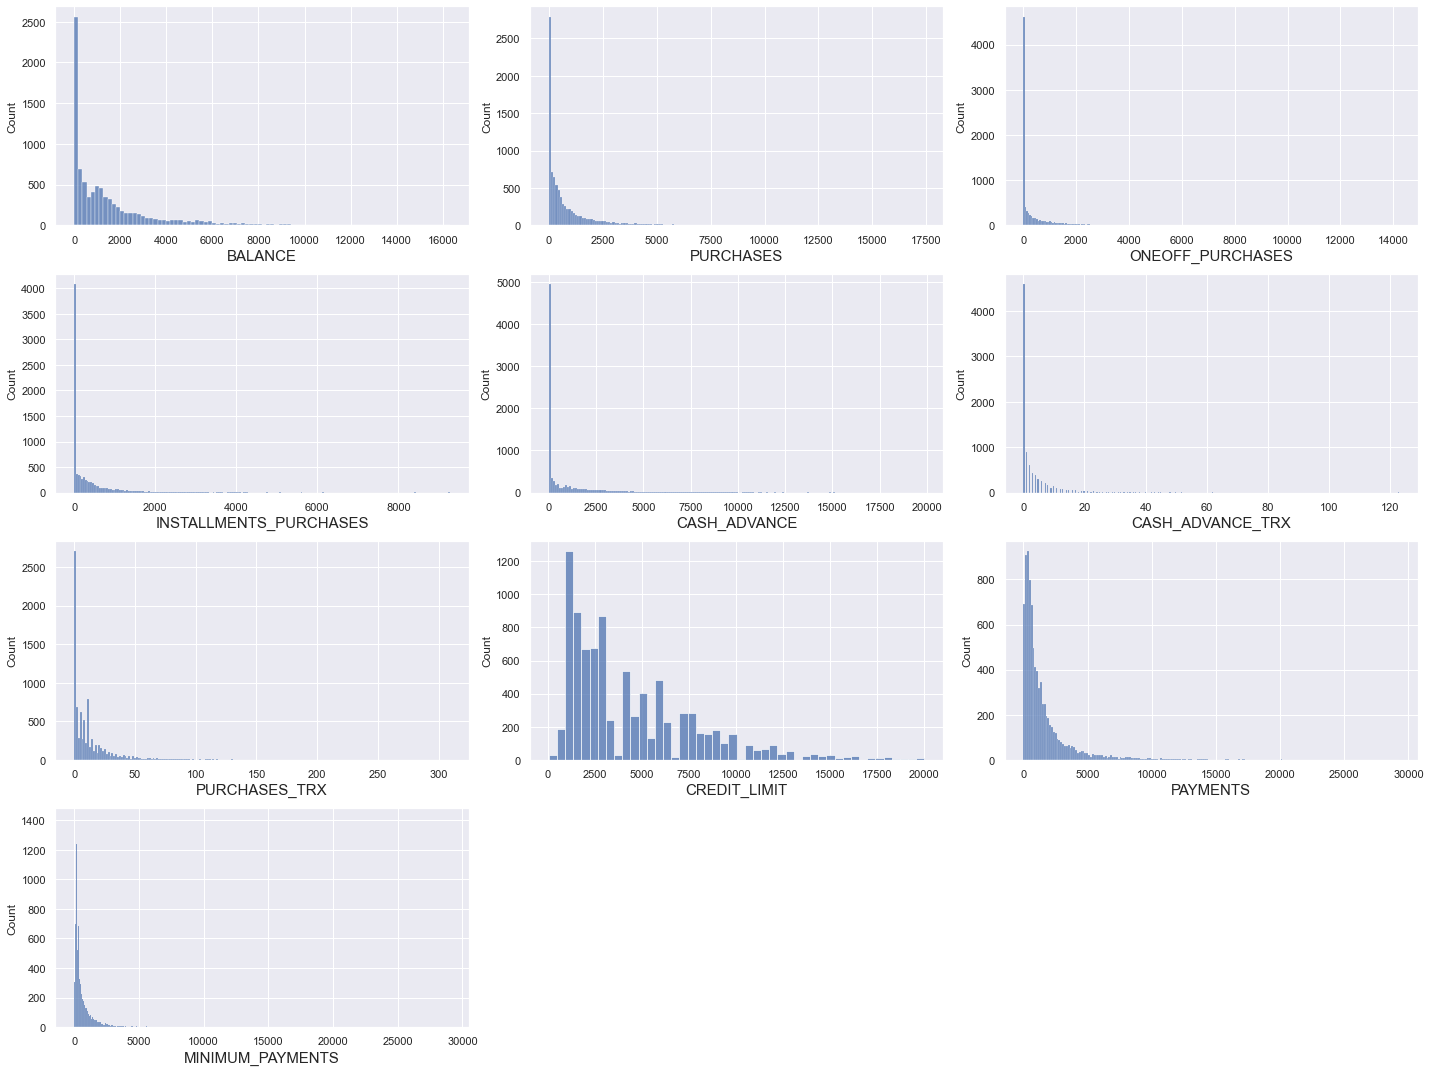

In [450]:
columns = df[['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS']]
# Boxplot untuk mengetahui outlier dan distribusi data
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in columns:
    if plotnumber <= 11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.histplot(columns[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Distribusi data dari beberapa features diatas adalah skewness, kita akan mengubah data dengan melakukan log transformation pada data preprocessing

Text(0.5, 1.0, 'Correlation Heatmap')

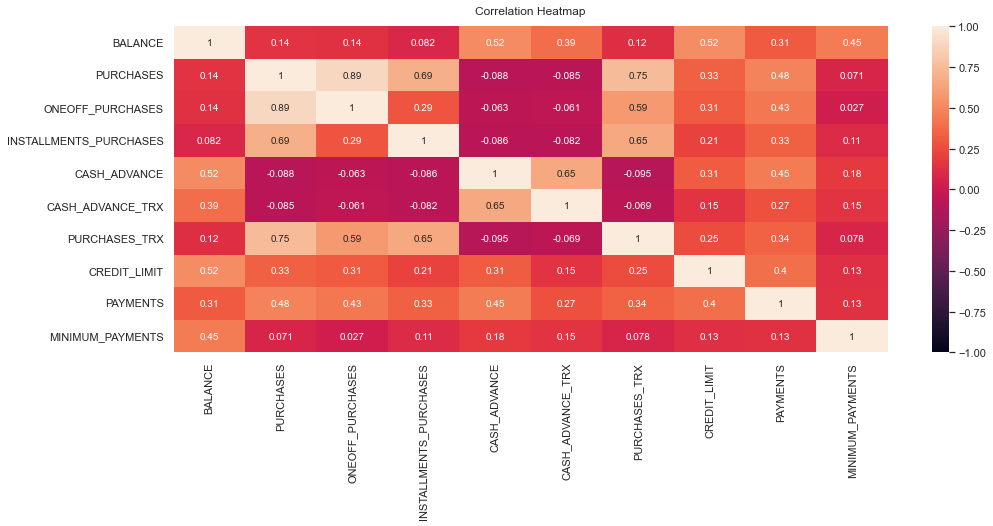

In [457]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(columns.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Correlation antar Features data numerik yang memiliki nilai yang rendah dapat disimpulkan bahwa features saling independent

Dari heatmap diatas ditemukan bahwa 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', dan 'PURCHASES_TRX' untuk unsupervised learning kita akan memakai features yang memiliki korelasi tinggi untuk menjadi sebuah cluster.

Untuk EDA selanjutnya kita akan fokus pada pada feature PURCHASE dan PAYMENTS sebagai ukuran penggunaan Kartu Kredit apakah dipengaruhi oleh features yang lain sebagai faktor yang berpengaruh

In [451]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.343947          0.000000      12  
4   678.334763        244.791237          0.000000      12

<AxesSubplot:xlabel='CASH_ADVANCE', ylabel='PAYMENTS'>

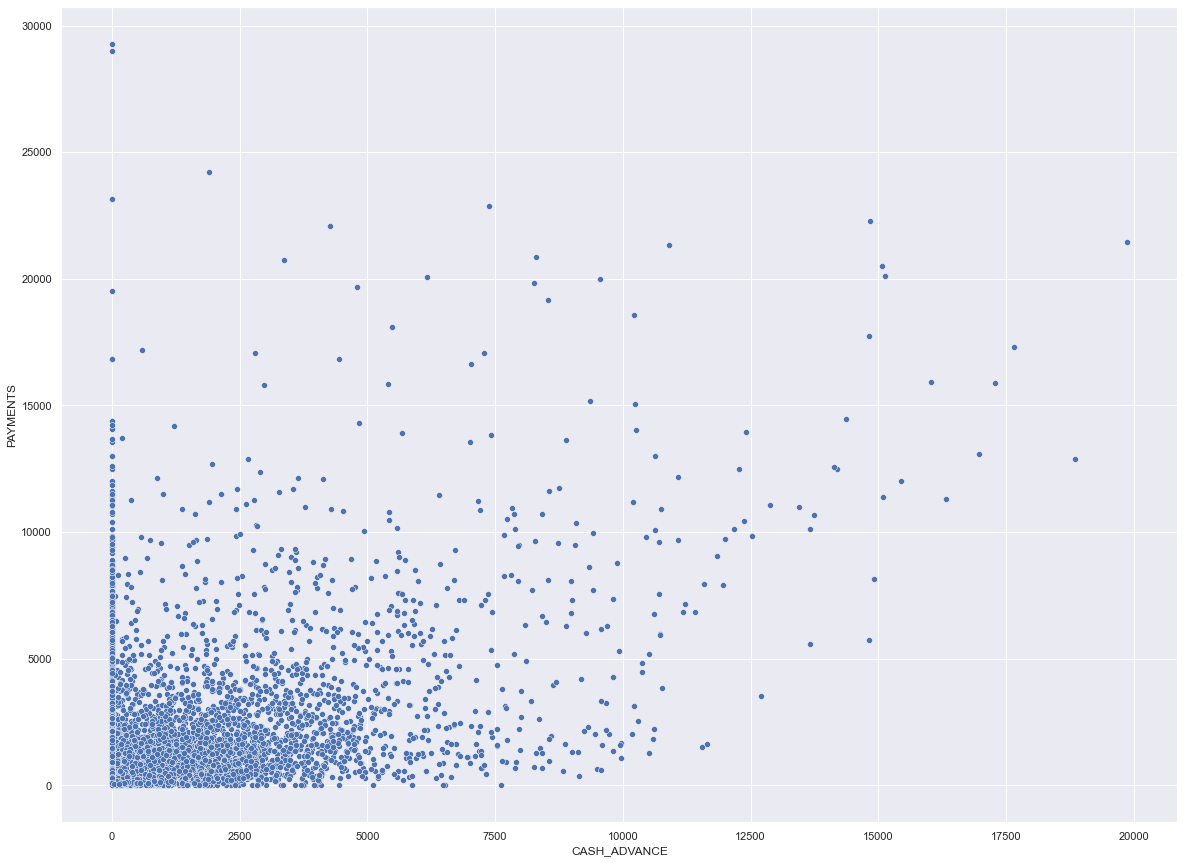

In [465]:
plt.figure(figsize = (20, 15))
sns.scatterplot(data=df, x="CASH_ADVANCE", y="PAYMENTS")

Jumlah CASH_ADVANCE yang semakin besar kurang berpengaruh terhadap penggunaan PAYMENT dengan kartu kredit

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='PURCHASES'>

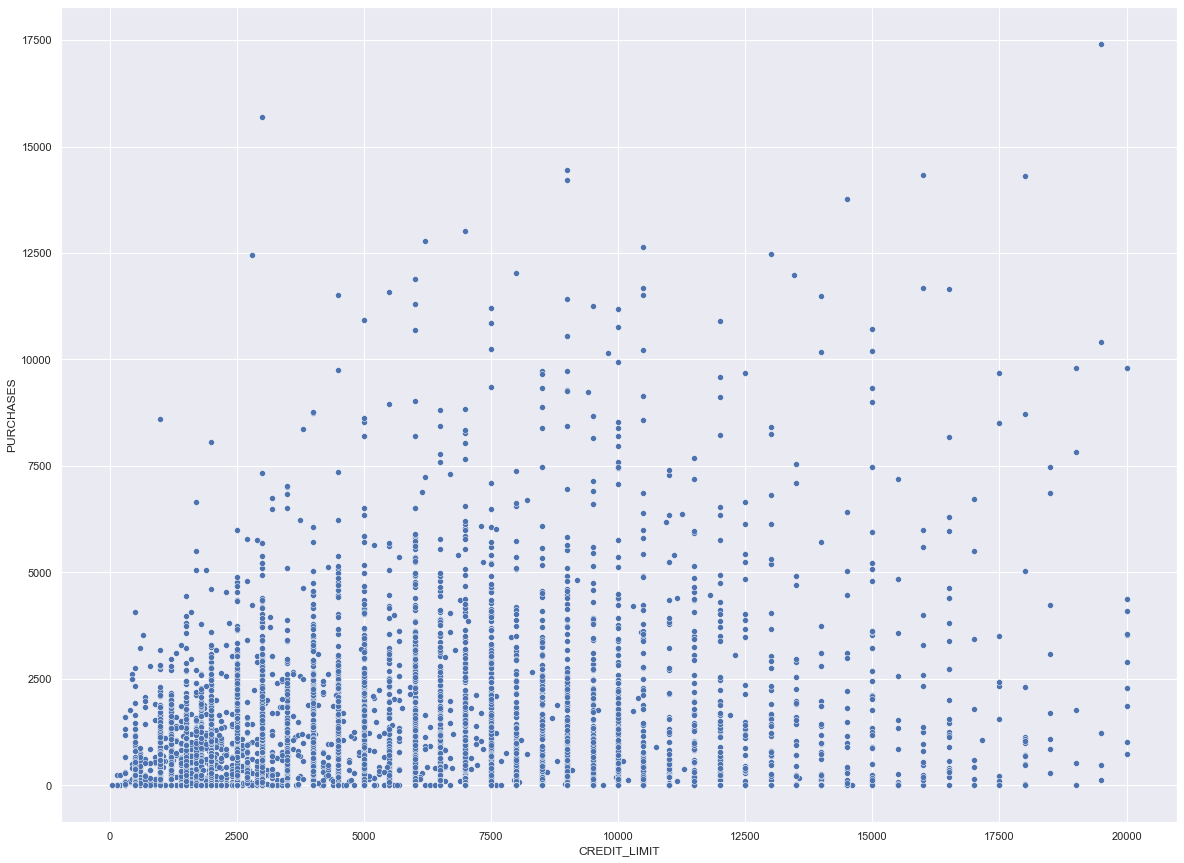

In [471]:
plt.figure(figsize = (20, 15))
sns.scatterplot(data=df, x="CREDIT_LIMIT", y="PURCHASES")

Batas Kredit Limit yang tinggi tidak menjamin nasabah menggunakan kartu kredit dengan melakukan PURCHASE, CREDIT_LIMIT antara 7500 hingga 12500 memiliki rata-rata PURCHASE tertinggi

In [460]:
df['TENURE'].value_counts()

12    7526
11     364
10     234
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

<AxesSubplot:xlabel='TENURE', ylabel='PURCHASES'>

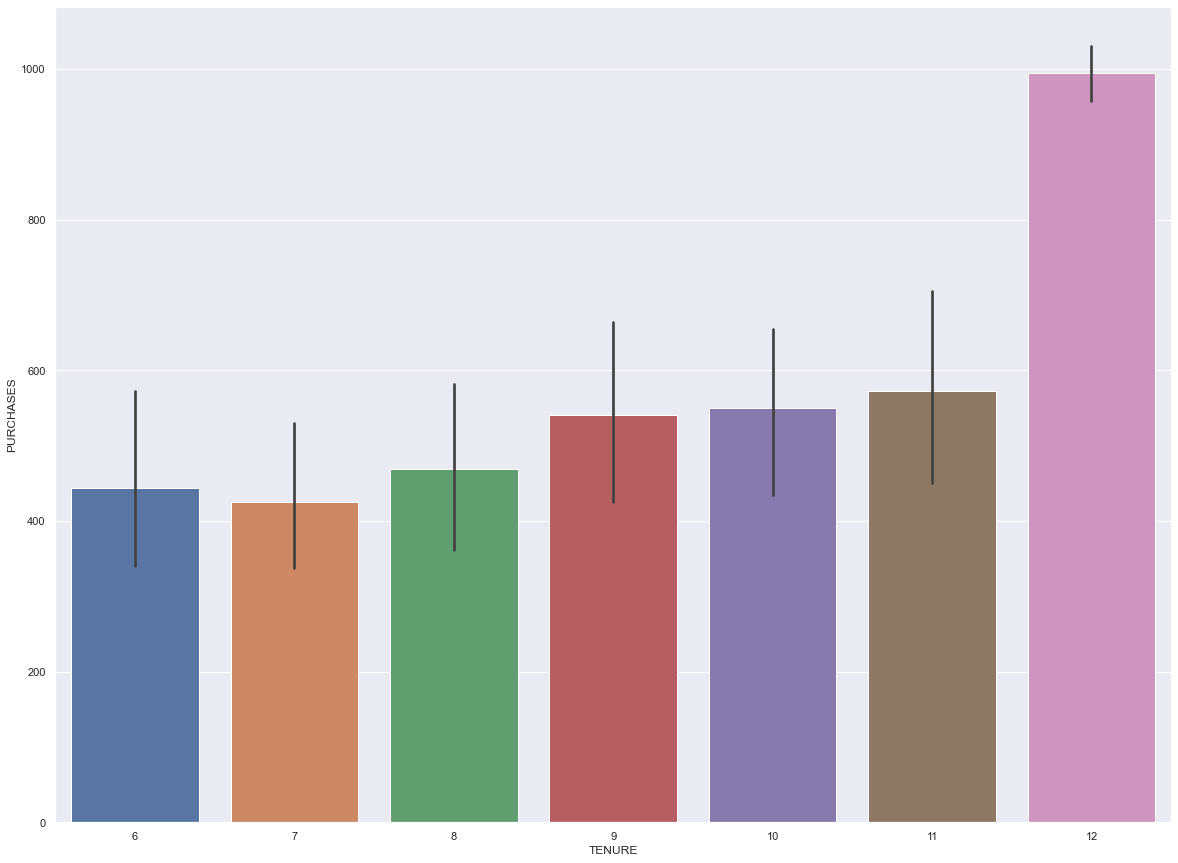

In [462]:
plt.figure(figsize = (20, 15))
sns.barplot(x='TENURE', y='PURCHASES', data=df)

Purchase dengan jumlah terbesar adalah Tenure 12, masa Tenure yang lebih panjang mendorong nasabah lebih membelanjakan sesuatu dengan karti kredit

<AxesSubplot:xlabel='BALANCE', ylabel='PAYMENTS'>

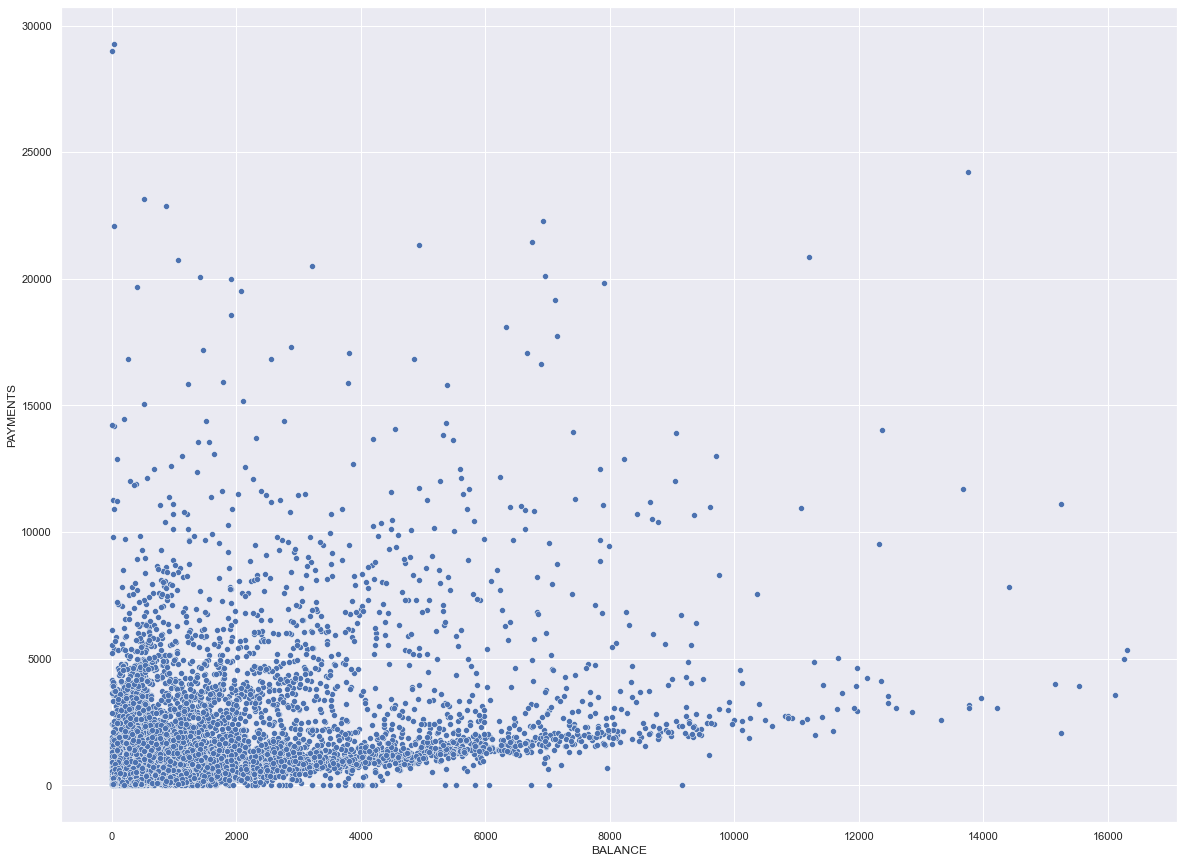

In [472]:
plt.figure(figsize = (20, 15))
sns.scatterplot(data=df, x="BALANCE", y="PAYMENTS")

BALANCE antara 0 hingga 4000 cenderung lebih sering menggunakan kartu kredit untuk melakukan PAYMENT

### Data Preprocessing

##### Feature Engineering: Change Data

In [369]:
columns_cat=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns_cat:
    
    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=0.1)),Range]=1
    df.loc[((df[c]>0.1)&(df[c]<=0.2)),Range]=2
    df.loc[((df[c]>0.2)&(df[c]<=0.3)),Range]=3
    df.loc[((df[c]>0.3)&(df[c]<=0.4)),Range]=4
    df.loc[((df[c]>0.4)&(df[c]<=0.5)),Range]=5
    df.loc[((df[c]>0.5)&(df[c]<=0.6)),Range]=6
    df.loc[((df[c]>0.6)&(df[c]<=0.7)),Range]=7
    df.loc[((df[c]>0.7)&(df[c]<=0.8)),Range]=8
    df.loc[((df[c]>0.8)&(df[c]<=0.9)),Range]=9
    df.loc[((df[c]>0.9)&(df[c]<=1.0)),Range]=10

In [370]:
df.shape

(8889, 23)

In [371]:
df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  ...     PAYMENTS  MINIMUM_PAYMENTS  \
0                0.000000  ...   201.802084        139.509787   
1                0.250000  ...  4103.032597       1072.340217   
2                0.000000  ...   622.066742        627.284787   
3                0.083333  ...     0.000000        312.343947   
4                0.000000  ...   678.334763        244.791237   

   PRC_FULL_PAYMENT  TENURE  BALANCE_FREQUENCY_RANGE  \
0          0.000000      12                        9   
1          0.222222      12                       10   
2          0.000000      12                       10   
3          0.000000      12                        7   
4          0.000000      12                       10   

   PURCHASES_FREQUENCY_RANGE  ONEOFF_PURCHASES_FREQUENCY_RANGE  \
0                          2                                 0   
1                          0                                 0   
2                         10                                10   
3                          1                                 1   
4                          1                                 1   

   PURCHASES_INSTALLMENTS_FREQUENCY_RANGE  CASH_ADVANCE_FREQUENCY_RANGE  \
0                                       1                             0   
1                                       0                             3   
2                                       0                             0   
3                                       0                             1   
4                                       0                             0   

   PRC_FULL_PAYMENT_RANGE  
0                       0  
1                       3  
2                       0  
3                       0  
4                       0  

[5 rows x 23 columns]

In [372]:
df.drop(['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT'], axis=1, inplace=True)

In [373]:
df.shape

(8889, 17)

In [375]:
train_data = df.copy()

##### Feature Engineering: Log Transformation

In [376]:
skewed_features = ['BALANCE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS']

for feature in skewed_features:
    train_data[feature] = np.log(1+train_data[feature])

In [377]:
train_data.head()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0  3.735304   4.568506          0.000000                4.568506   
1  8.071989   0.000000          0.000000                0.000000   
2  7.822504   6.651791          6.651791                0.000000   
3  7.419183   7.313220          7.313220                0.000000   
4  6.707735   2.833213          2.833213                0.000000   

   CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  PAYMENTS  \
0      0.000000          0.000000       1.098612      6.908755  5.312231   
1      8.770896          1.609438       0.000000      8.853808  8.319725   
2      0.000000          0.000000       2.564949      8.922792  6.434654   
3      5.331694          0.693147       0.693147      8.922792  0.000000   
4      0.000000          0.000000       0.693147      7.090910  6.521114   

   MINIMUM_PAYMENTS  TENURE  BALANCE_FREQUENCY_RANGE  \
0          4.945277      12                        9   
1          6.978531      12                       10   
2          6.442994      12                       10   
3          5.747301      12                        7   
4          5.504483      12                       10   

   PURCHASES_FREQUENCY_RANGE  ONEOFF_PURCHASES_FREQUENCY_RANGE  \
0                          2                                 0   
1                          0                                 0   
2                         10                                10   
3                          1                                 1   
4                          1                                 1   

   PURCHASES_INSTALLMENTS_FREQUENCY_RANGE  CASH_ADVANCE_FREQUENCY_RANGE  \
0                                       1                             0   
1                                       0                             3   
2                                       0                             0   
3                                       0                             1   
4                                       0                             0   

   PRC_FULL_PAYMENT_RANGE  
0                       0  
1                       3  
2                       0  
3                       0  
4                       0

### Pendefinisian Model

#### Clustering

Karena data Unsupervised Learning maka kita akan menggunakan algoritma clustering untuk memberikan label pada setiap data. Algoritma clustering yang akan kita gunakan saat ini adalah Kmeans, DBSCAN, Spectral Clustering dan Agglomerative Clustering. Sedangkan untuk interpretasi dari hasil clustering kita akan bahas dari algoritma KMeans pada bagian V.

In [259]:
# rescaling data
scale = StandardScaler()
train_data = scale.fit_transform(train_data)

##### Menentukan Jumlah Cluster Optimum

Untuk menentukan jumlah cluster yang optimum kita bisa gunakan beberapa metode: Elbow Methods, Silhouette Score, dan Silhouette Plote

Elbow Methods

Text(0, 0.5, 'Inertia')

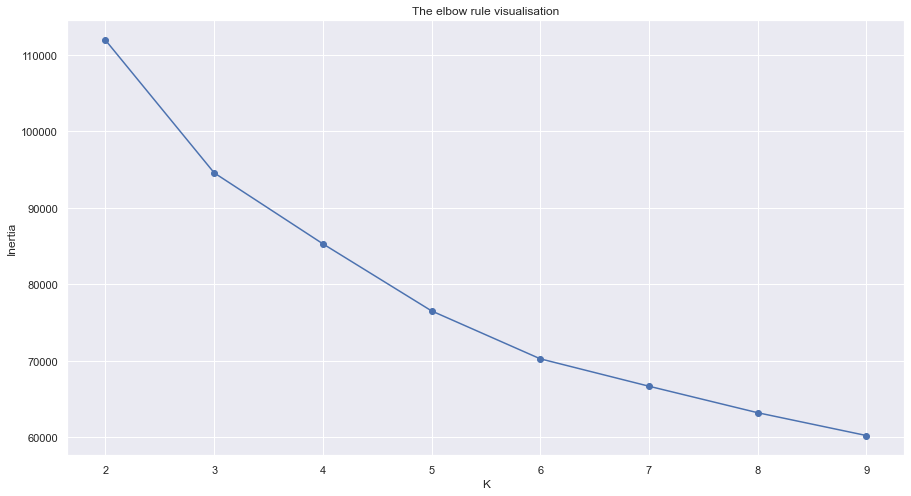

In [262]:
sns.set(rc = {'figure.figsize':(15,8)})
K=range(2, 10)
inertia=[KMeans(n_clusters=i).fit(train_data).inertia_ for i in K]
plt.title("The elbow rule visualisation")
plt.plot(K,inertia, '-o')
plt.xlabel('K')
plt.ylabel('Inertia')

Hasil Elbow Methods kita belum bisa pastikan jumlah cluster yang optimum, jika dilihat dari Elbow Methods jumlah cluster optimum berada pada range(3, 8). Selanjutnya kita akan Evaluasi dengan metode Silhouette Score dan Silhouette Plote

Text(0, 0.5, 'Silhouette Score')

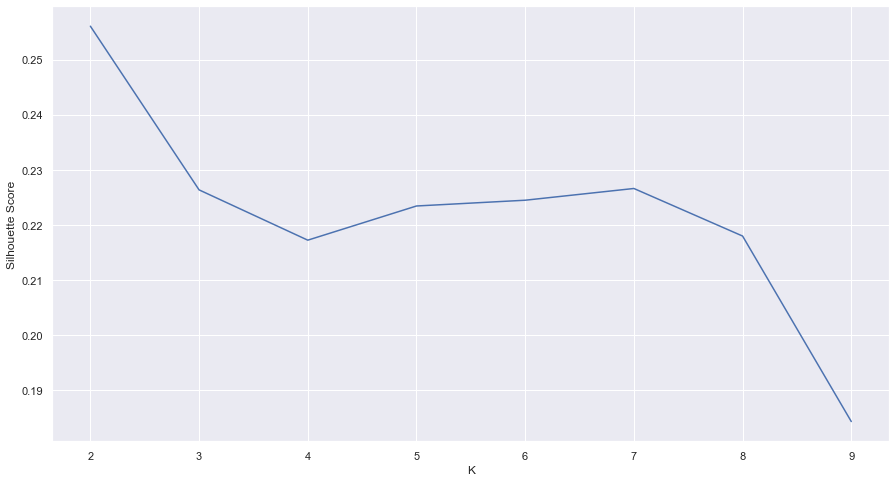

In [263]:
K=range(2, 10)

s_score=[silhouette_score(train_data, KMeans(n_clusters=i).fit(train_data).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

Hasil Silhouette Score tertinggi adalah di K=3 dan K=7

In [264]:
# Fungsi Plot Silhouette

def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.2560760515800885
For n_clusters = 3 The average silhouette_score is : 0.2265648439040788
For n_clusters = 4 The average silhouette_score is : 0.217497776312997
For n_clusters = 5 The average silhouette_score is : 0.22347985802800172
For n_clusters = 6 The average silhouette_score is : 0.224241429103882
For n_clusters = 7 The average silhouette_score is : 0.2137178312736643
For n_clusters = 8 The average silhouette_score is : 0.2192001380044338
For n_clusters = 9 The average silhouette_score is : 0.21702201486151693


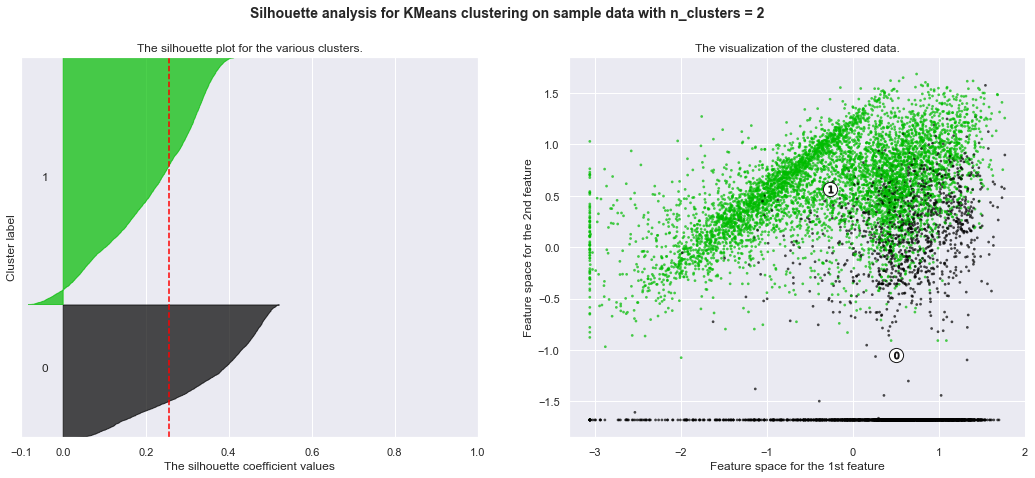

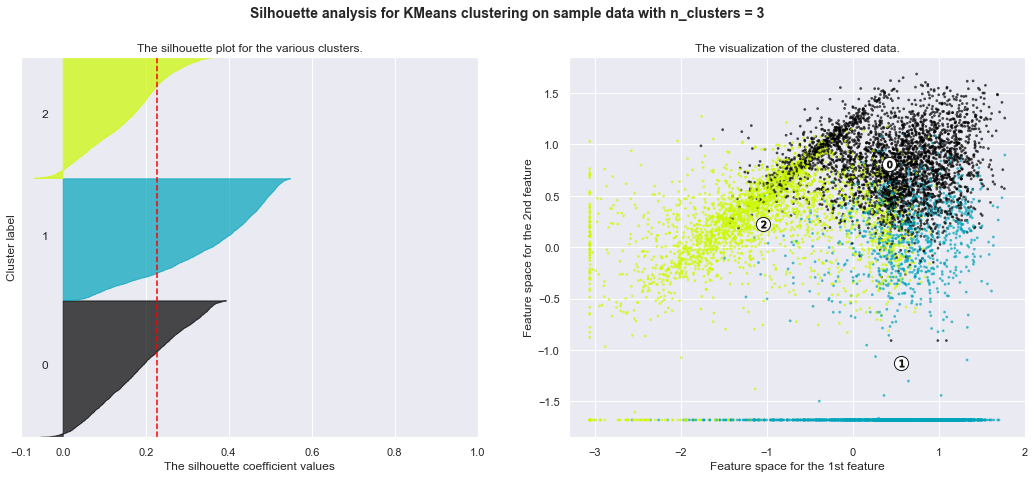

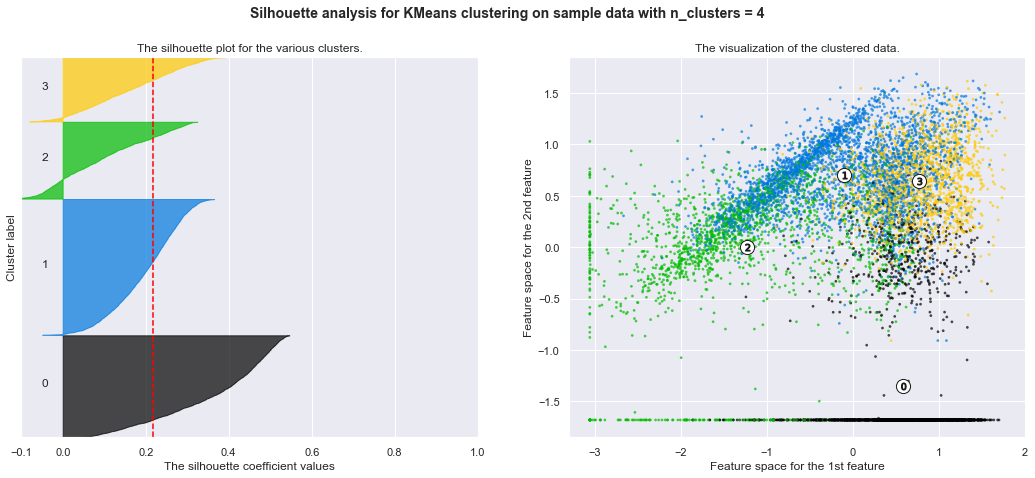

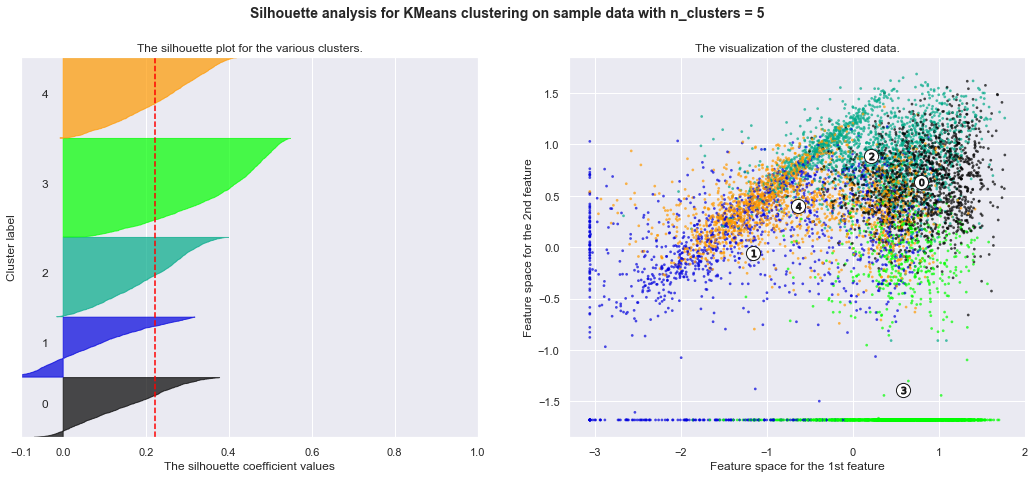

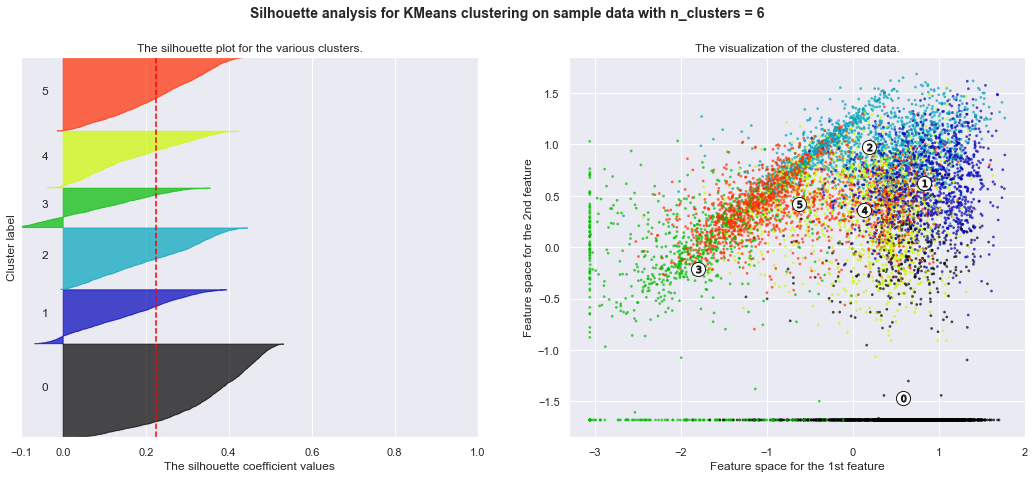

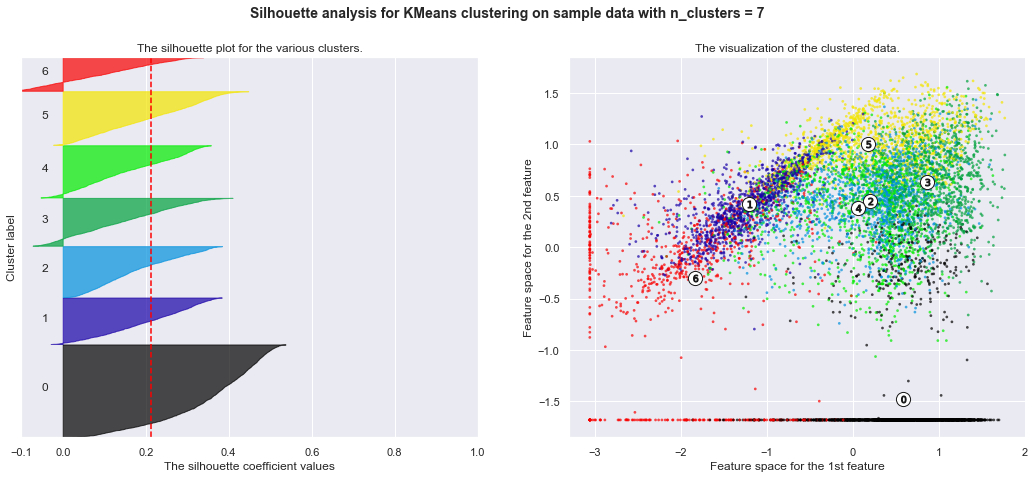

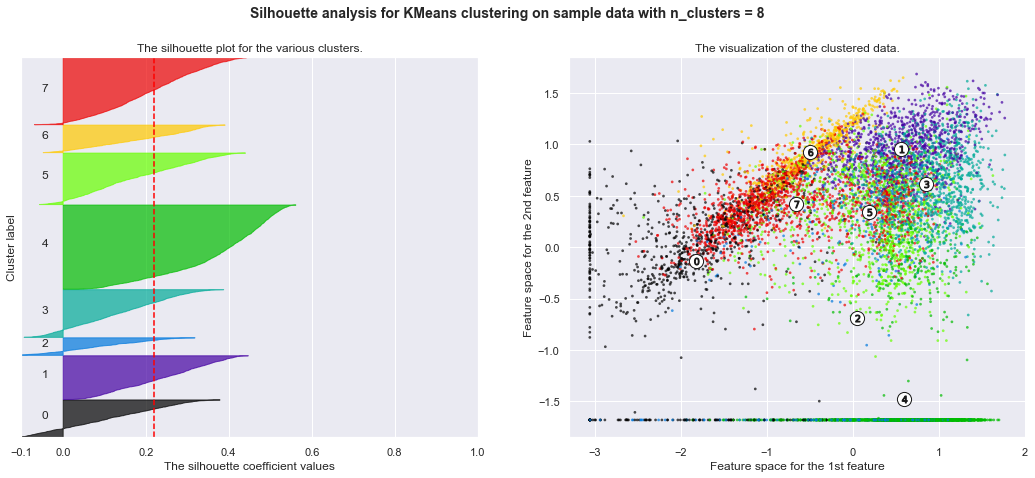

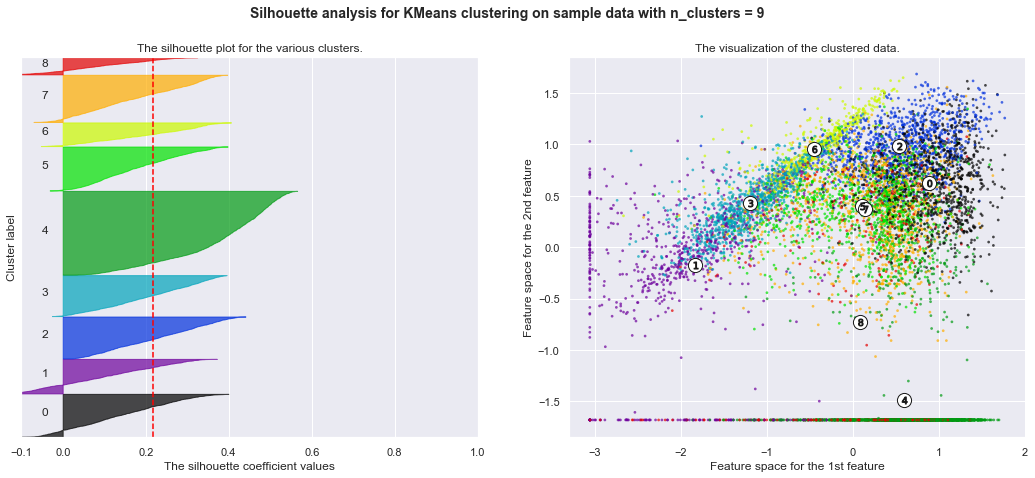

In [266]:
plot_silhouette(K,train_data)

Hasil Silhouette Plot secara subjektif dari penulis melihat bahwa jumlah cluster optimum adalah n_cluster = 6 dan n_cluster = 7

**Kesimpulan: Hasil ketiga metode untuk menentukan jumlah cluster optimum adalah n_cluster = 7**


Selanjutnya kita akan gunakan n_cluster = 7 untuk algorithms yang menggunakan jumlah cluster sebagai input parameter

##### I. Algoritma Clustering: Kmeans

Dipilih n_cluster = 7, metode inisialisasi adalah 'k-means++' memilih kluster awal untuk clustering dengan cara yang cerdas untuk mempercepat kekonvergenan, dan algorithm = 'elkan' agar data lebih efisien 

In [282]:
model = KMeans(n_clusters=7, init='k-means++', random_state=0, algorithm='elkan')
y_kmeans = model.fit_predict(train_data)

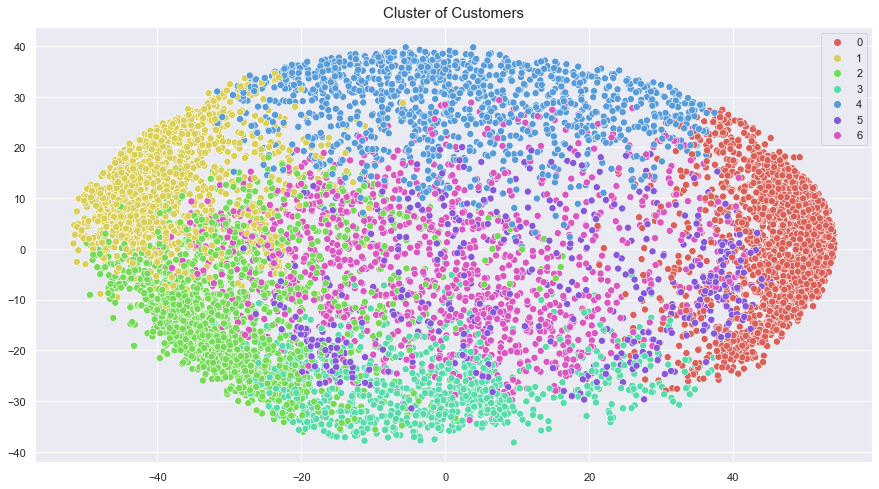

In [283]:
from sklearn.metrics.pairwise import cosine_similarity

dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y_kmeans, palette=sns.color_palette('hls', model.cluster_centers_.shape[0]), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

##### II. Algoritma Clustering: DBSCAN

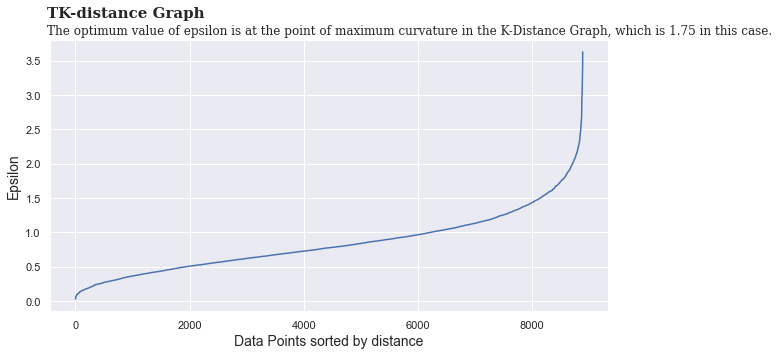

In [269]:
from sklearn.neighbors import NearestNeighbors
# finding nearest points distance for every row in data
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(train_data)
distances, indices = nbrs.kneighbors(train_data)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
p=max(distances)+0.5
plt.text(-500, p, 'TK-distance Graph', fontfamily='serif', fontsize=15, fontweight='bold')
plt.text(-500, p-0.25, 'The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 1.75 in this case.',
        fontfamily='serif', fontsize=12)
plt.plot(distances)
plt.xlabel('Data Points sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

Berdasarkan grafik diatas dipilih eps = 1.75, dan untuk min_samples=10

In [270]:
# Building the clustering model 
model = DBSCAN(eps=1.75, min_samples=10) 
  
# Training the model and Storing the predicted cluster labels 
y = model.fit_predict(train_data)

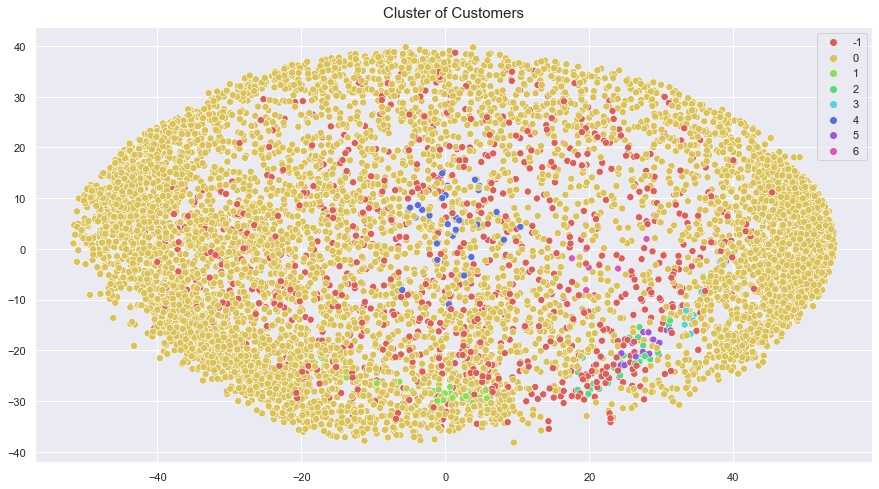

In [271]:
dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

Algoritma DBSCAN menghasilkan 7 cluster dan outlier ini bisa dilihat dari data yang berwarna merah dengan kode -1

In [273]:
np.unique(model.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [275]:
y.shape

(8889,)

##### III. Algoritma Clustering: Spectral Clustering

Dipilih n_clusters=7 dan affinity matrix menggunakan kernel fungsi radial basis

In [276]:
# Building the clustering model 
model = SpectralClustering(n_clusters=7, affinity='rbf') 
  
# Training the model and Storing the predicted cluster labels 
y = model.fit_predict(train_data)

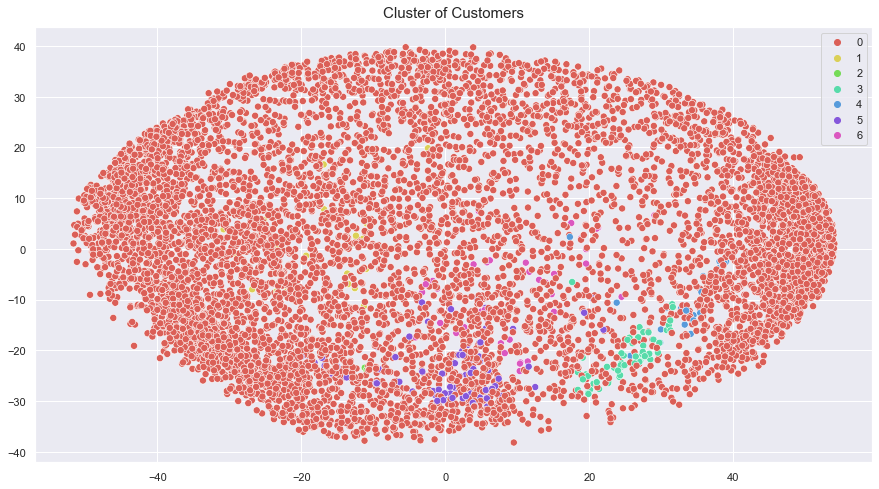

In [277]:
dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

Berdasarkan plot PCA 2 dimensi diatas algoritma Spectral Clustering yang paling mendominasi adalah Cluster 0 dengan warna merah


##### IV. Algoritma Clustering: AgglomerativeClustering

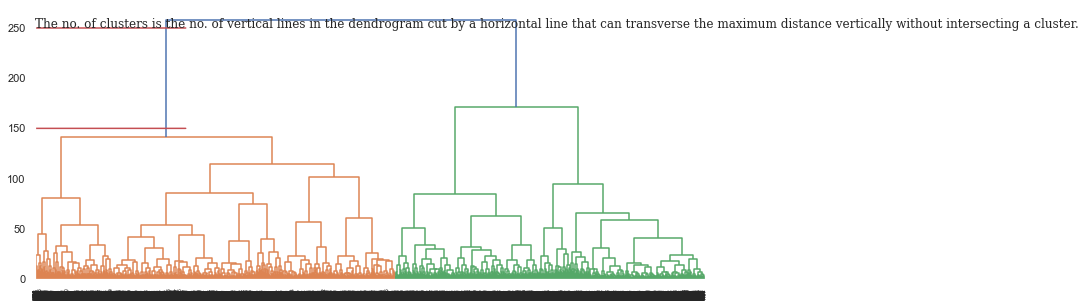

In [278]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (12, 5))
plt.text(5, 250, 'The no. of clusters is the no. of vertical lines in the dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.',
         fontfamily='serif',fontsize=12)
dendo = dendrogram(linkage(train_data, method='ward'))
plt.plot([250]*20000, color='r')
plt.plot([150]*20000, color='r')
plt.show()

In [279]:
model = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y = model.fit_predict(train_data)

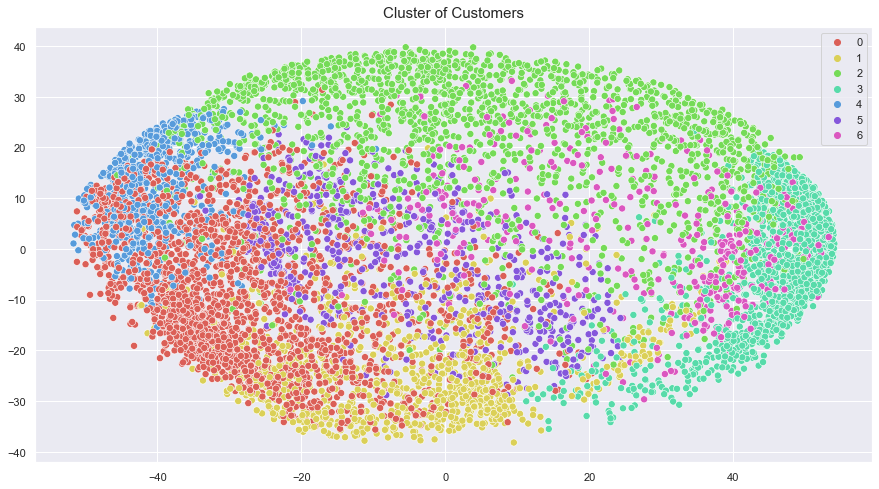

In [280]:
dist = 1-cosine_similarity(train_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

# Visualizing all the clusters 
plt.figure(figsize=(15,8))
sns.scatterplot(x=X_PCA[:, 0], y=X_PCA[:, 1], 
                hue=y, palette=sns.color_palette('hls', len(np.unique(y))), s=50)
plt.title('Cluster of Customers', size=15, pad=10)
plt.legend(loc=0, bbox_to_anchor=[1,1])
plt.show()

##### V. Interpretasi Model KMeans



Untuk Interpretasi dari hasil clustering kita pilih salah satu algoritma clustering yaitu kmeans, kita hanya pilih beberapa features sebagai definisi dari masing-masing cluster. Features yang kita pilih adalah: BALANCE, PURCHASES, CASH_ADVANCE, CREDIT_LIMIT dan PAYMENTS

In [379]:
df['labels'] = y
df.head()

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0    40.900749      95.40              0.00                    95.4   
1  3202.467416       0.00              0.00                     0.0   
2  2495.148862     773.17            773.17                     0.0   
3  1666.670542    1499.00           1499.00                     0.0   
4   817.714335      16.00             16.00                     0.0   

   CASH_ADVANCE  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
0      0.000000                 0              2        1000.0   201.802084   
1   6442.945483                 4              0        7000.0  4103.032597   
2      0.000000                 0             12        7500.0   622.066742   
3    205.788017                 1              1        7500.0     0.000000   
4      0.000000                 0              1        1200.0   678.334763   

   MINIMUM_PAYMENTS  TENURE  BALANCE_FREQUENCY_RANGE  \
0        139.509787      12                        9   
1       1072.340217      12                       10   
2        627.284787      12                       10   
3        312.343947      12                        7   
4        244.791237      12                       10   

   PURCHASES_FREQUENCY_RANGE  ONEOFF_PURCHASES_FREQUENCY_RANGE  \
0                          2                                 0   
1                          0                                 0   
2                         10                                10   
3                          1                                 1   
4                          1                                 1   

   PURCHASES_INSTALLMENTS_FREQUENCY_RANGE  CASH_ADVANCE_FREQUENCY_RANGE  \
0                                       1                             0   
1                                       0                             3   
2                                       0                             0   
3                                       0                             1   
4                                       0                             0   

   PRC_FULL_PAYMENT_RANGE  labels  
0                       0       3  
1                       3       0  
2                       0       6  
3                       0       6  
4                       0       6

In [395]:
PALETTE = sns.color_palette("Set2")

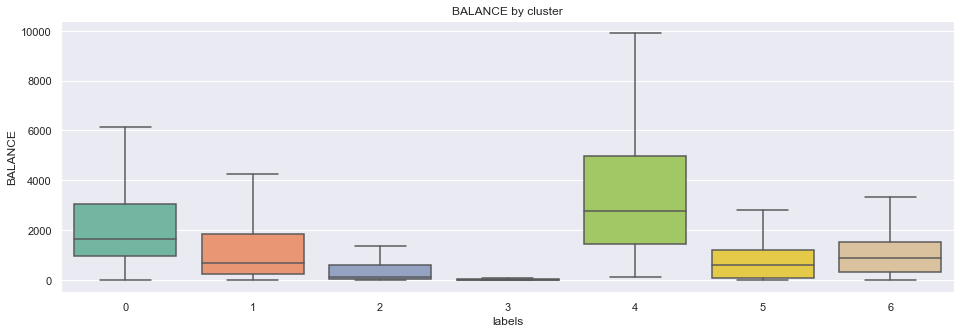

In [391]:
plt.figure(figsize=(16,5))
plt.title(f'BALANCE by cluster')
ax = sns.boxplot(data=df, x='labels', y='BALANCE', palette=PALETTE, showfliers=False)
plt.show()

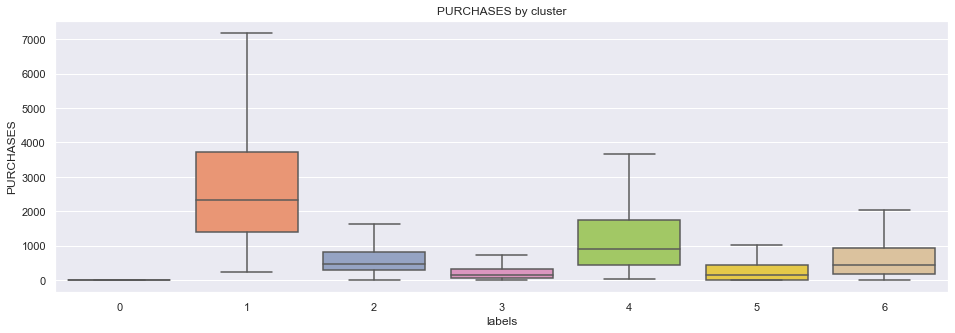

In [401]:
plt.figure(figsize=(16,5))
plt.title(f'PURCHASES by cluster')
ax = sns.boxplot(data=df, x='labels', y='PURCHASES', palette=PALETTE, showfliers=False)
plt.show()

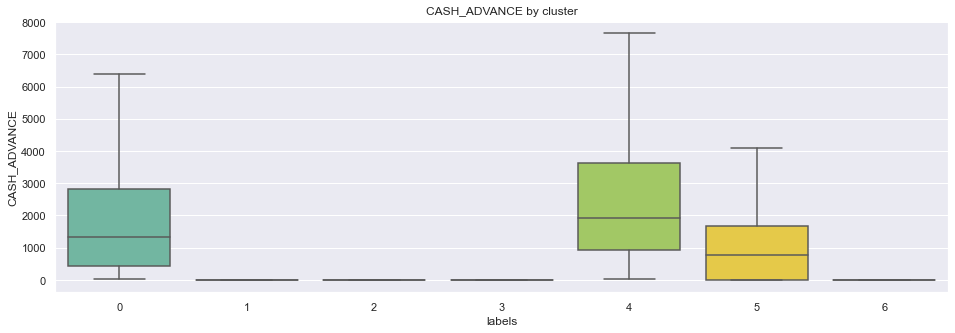

In [389]:
plt.figure(figsize=(16,5))
plt.title(f'CASH_ADVANCE by cluster')
ax = sns.boxplot(data=df, x='labels', y='CASH_ADVANCE', palette=PALETTE, showfliers=False)
plt.show()

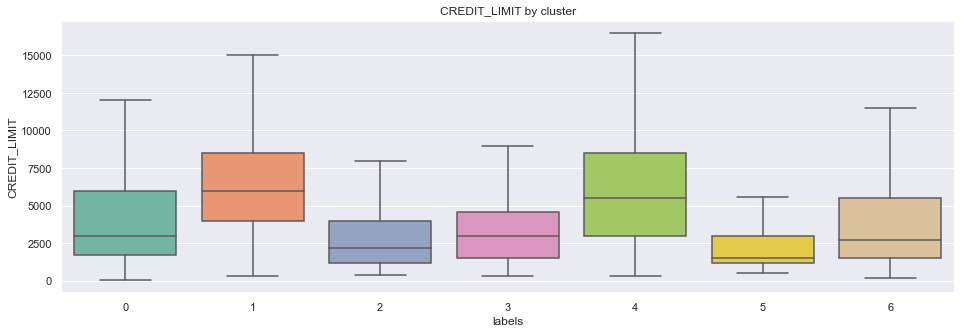

In [388]:
plt.figure(figsize=(16,5))
plt.title(f'CREDIT_LIMIT by cluster')
ax = sns.boxplot(data=df, x='labels', y='CREDIT_LIMIT', palette=PALETTE, showfliers=False)
plt.show()

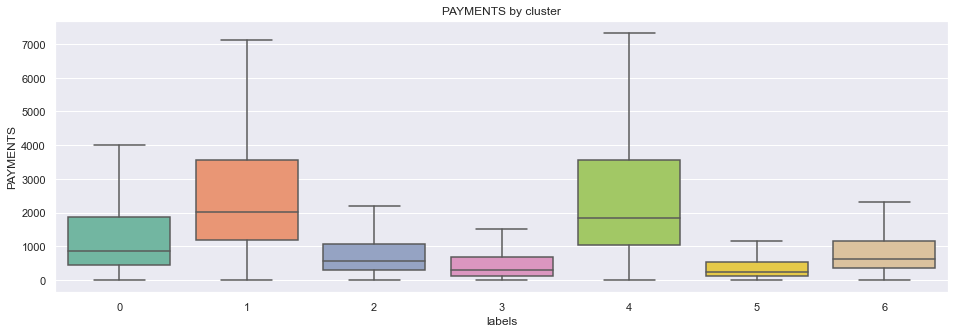

In [392]:
plt.figure(figsize=(16,5))
plt.title(f'PAYMENTS by cluster')
ax = sns.boxplot(data=df, x='labels', y='PAYMENTS', palette=PALETTE, showfliers=False)
plt.show()

**Results**

*Labels: 0*
> Cluster dengan rata-rata balance dan cash advance yang tinggi namun dengan rata-rata purchase yang paling sedikit

*Labels: 1*
> Cluster dengan rata-rata paling atas untuk purchase, memiliki credit limit yang tinggi dengan jumlah payment yang lumayan besar

*Labels: 2*
> Cluster dengan rata-rata balance dan credit limit rendah rendah, cukup jarang melakukan payment 

*Labels: 3*
> Cluster dengan rata-rata balance dan purchase paling rendah, namun dengan rata-rata cash advance dikelas menengah 


*Labels: 4*
> Cluster dengan rata-rata paling atas berdasarkan balance, cash advance, credit limit, dan payment dengan purchases yang tinggi


*Labels: 5*
> Cluster dengan rata-rata credit limit dan payment paling rendah, namun dengan rata-rata cash advance yang cukup tinggi 


*Labels: 6*
> Cluster dengan rata-rata purchase cukup tinggi namun memiliki credit limit dan balance dengan rata-rata moderate

#### Classification

Kita akan menguji features dan label kita hasil algoritma clustering KMeans dengan menggunakan algoritma clasification yaitu Gaussian Naive Bayes 


In [286]:
train_data.shape

(8889, 17)

In [328]:
y_kmeans

array([3, 0, 6, ..., 5, 5, 5])

In [315]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Split train test data
# Take only 5% as test data
X_train, X_test, y_train, y_test = train_test_split(train_data, y_kmeans, test_size=0.2, stratify=y, random_state = 0)

gnb = GaussianNB()

### Pelatihan Model

In [316]:
model_gnb = gnb.fit(X_train, y_train)

### Evaluasi Model

In [317]:
gnb_predictions = gnb.predict(X_test)

In [318]:
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

0.9184476940382452


C:\Users\sivis\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



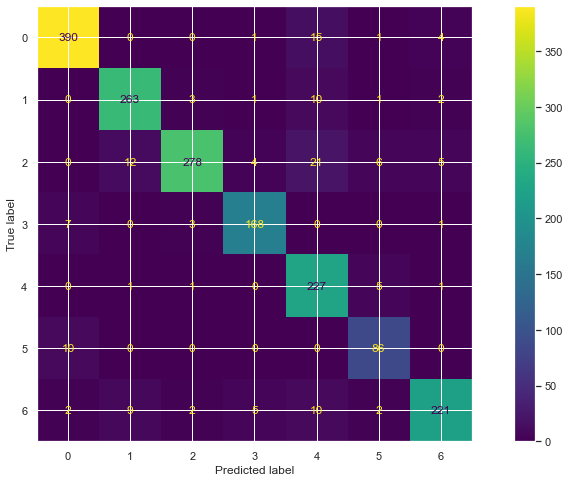

In [319]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()

In [320]:
from sklearn.metrics import classification_report
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       411
           1       0.92      0.94      0.93       280
           2       0.97      0.85      0.91       326
           3       0.94      0.94      0.94       179
           4       0.80      0.97      0.88       235
           5       0.85      0.90      0.87        96
           6       0.94      0.88      0.91       251

    accuracy                           0.92      1778
   macro avg       0.91      0.92      0.91      1778
weighted avg       0.92      0.92      0.92      1778



### Model Inference

In [321]:
# Check data train sebaga role model untuk prediksi data baru
X_train[0]

array([-2.38755555, -0.04482955, -0.98591721,  0.4609996 , -0.93196711,
       -0.8115676 , -0.36501736, -1.44709941, -0.38296409, -0.88561627,
        0.36170437, -3.05593993, -0.52160307, -0.70659119, -0.20140099,
       -0.70947988,  0.79162947])

In [322]:
y_kmeans[0]

3

In [333]:
X_pred = [[2.38755555, -0.04482955, -0.98591721,  0.4609996 , -0.93196711,
       -0.8115676 , -0.36501736, -1.44709941, -0.38296409, -0.88561627,
        0.36170437, -3.05593993, -0.52160307, -0.70659119, -0.20140099,
       -0.70947988,  0.79162947], [
       0.38755555, -1.04482955, -1.98591721,  1.4609996 , -1.93196711,
       -2.8115676 , -0.36501736, -1.44709941, -1.38296409, -1.88561627,
        0.36170437, -4.05593993, -2.52160307, -1.70659119, -2.20140099,
       -0.70947988,  1.79162947]]

In [334]:
print("Prediksi Model Gaussian Naive Bayes: ", gnb.predict(X_pred))
print("-"*100)

Prediksi Model Gaussian Naive Bayes:  [3 3]
----------------------------------------------------------------------------------------------------


### Pengambilan Kesimpulan

Ketiga Model Clustering menghasilkan n_cluster = 7 selanjutnya data yang telah memiliki labels akan di evaluasi menggunakan model Gaussian Naive Bayes menghasilkan accuracy_score yang tinggi 0.92 artinya model dapat memprediksi dengan baik data baru yang telah kita input